<a href="https://colab.research.google.com/github/SupreetGha/ray-internation-traditioanl/blob/main/Portfolio_MGMT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  4 of 4 completed


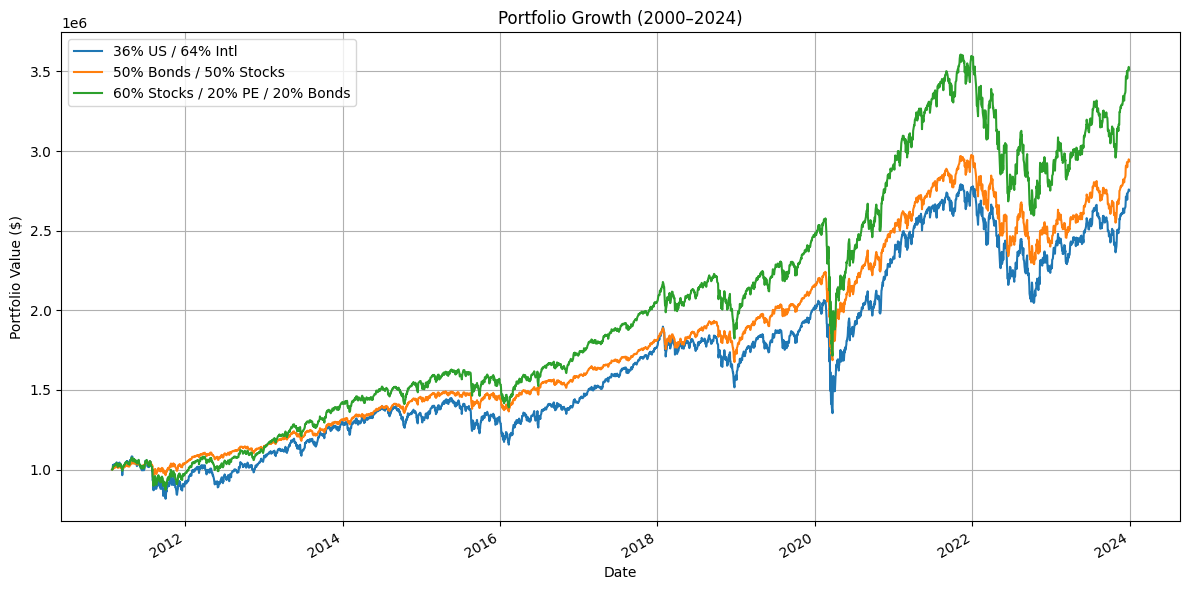


📊 Final Portfolio Values:
36% US / 64% Intl                  $2,753,219
50% Bonds / 50% Stocks             $2,935,493
60% Stocks / 20% PE / 20% Bonds    $3,511,097
Name: 2023-12-29 00:00:00, dtype: object


In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def fetch_prices(tickers, start='2000-01-01', end='2024-01-01'):
    data = yf.download(tickers, start=start, end=end, group_by='ticker', threads=False, auto_adjust=True)
    clean_data = pd.DataFrame()

    for ticker in tickers:
        try:
            if isinstance(data.columns, pd.MultiIndex):
                clean_data[ticker] = data[ticker]['Close']
            else:
                clean_data[ticker] = data['Close']
        except Exception as e:
            print(f"⚠️ Skipped {ticker} due to: {e}")
    return clean_data.dropna()

def simulate_portfolio(prices, weights, initial_investment=1_000_000):
    normalized = prices / prices.iloc[0]
    weighted = normalized.mul(weights, axis=1)
    portfolio = weighted.sum(axis=1) * initial_investment
    return portfolio

# Define portfolios
portfolios = {
    "36% US / 64% Intl": {
        "tickers": ['VTI', 'VXUS'],
        "weights": [0.36, 0.64]
    },
    "50% Bonds / 50% Stocks": {
        "tickers": ['BND', 'VTI'],
        "weights": [0.5, 0.5]
    },
    "60% Stocks / 20% PE / 20% Bonds": {
        "tickers": ['VTI', 'PSP', 'BND'],
        "weights": [0.6, 0.2, 0.2]
    }
}

# Run simulation
results = {}
all_tickers = list({ticker for p in portfolios.values() for ticker in p['tickers']})
price_data = fetch_prices(all_tickers)

for name, portfolio in portfolios.items():
    valid_tickers = [t for t in portfolio['tickers'] if t in price_data.columns]
    valid_weights = [w for t, w in zip(portfolio['tickers'], portfolio['weights']) if t in price_data.columns]

    if len(valid_tickers) < len(portfolio['tickers']):
        print(f"⚠️ Skipping portfolio '{name}' due to missing data.")
        continue

    prices = price_data[valid_tickers]
    result = simulate_portfolio(prices, valid_weights)
    results[name] = result

# Combine and plot
portfolio_df = pd.DataFrame(results)
portfolio_df.plot(figsize=(12, 6), title='Portfolio Growth (2000–2024)', ylabel='Portfolio Value ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Show final values
print("\n📊 Final Portfolio Values:")
print(portfolio_df.iloc[-1].apply(lambda x: f"${x:,.0f}"))


[*********************100%***********************]  10 of 10 completed


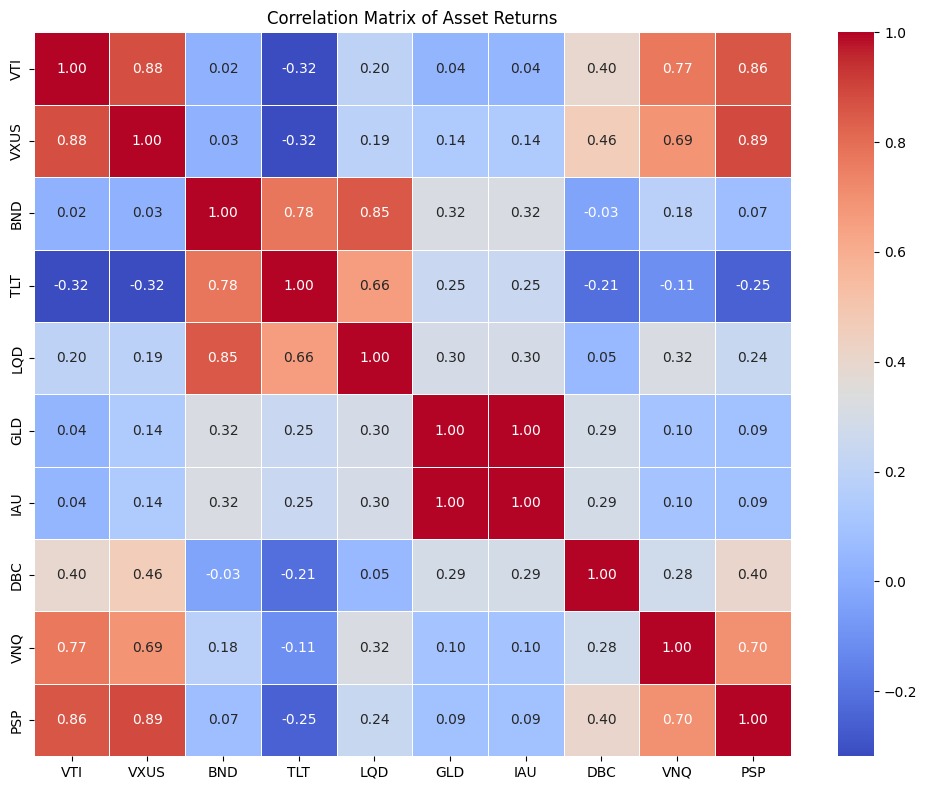


Correlation Matrix:

       VTI  VXUS   BND   TLT   LQD   GLD   IAU   DBC   VNQ   PSP
VTI   1.00  0.88  0.02 -0.32  0.20  0.04  0.04  0.40  0.77  0.86
VXUS  0.88  1.00  0.03 -0.32  0.19  0.14  0.14  0.46  0.69  0.89
BND   0.02  0.03  1.00  0.78  0.85  0.32  0.32 -0.03  0.18  0.07
TLT  -0.32 -0.32  0.78  1.00  0.66  0.25  0.25 -0.21 -0.11 -0.25
LQD   0.20  0.19  0.85  0.66  1.00  0.30  0.30  0.05  0.32  0.24
GLD   0.04  0.14  0.32  0.25  0.30  1.00  1.00  0.29  0.10  0.09
IAU   0.04  0.14  0.32  0.25  0.30  1.00  1.00  0.29  0.10  0.09
DBC   0.40  0.46 -0.03 -0.21  0.05  0.29  0.29  1.00  0.28  0.40
VNQ   0.77  0.69  0.18 -0.11  0.32  0.10  0.10  0.28  1.00  0.70
PSP   0.86  0.89  0.07 -0.25  0.24  0.09  0.09  0.40  0.70  1.00


In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def fetch_prices(tickers, start='2000-01-01', end='2024-01-01'):
    data = yf.download(tickers, start=start, end=end, group_by='ticker', auto_adjust=True)
    all_prices = pd.DataFrame()

    for ticker in tickers:
        try:
            ticker_data = data[ticker]['Close']
            all_prices[ticker] = ticker_data
        except Exception as e:
            print(f"Failed to load {ticker}: {e}")

    return all_prices.dropna()

# Ray Dalio-style candidate tickers (different asset classes)
tickers = [
    'VTI',   # US Stocks
    'VXUS',  # Intl Stocks
    'BND',   # US Bonds
    'TLT',   # Long-term Treasuries
    'LQD',   # Investment-grade corporate bonds
    'GLD',   # Gold
    'IAU',   # Gold alternative
    'DBC',   # Commodities
    'VNQ',   # Real estate (REITs)
    'PSP',   # Private equity ETF
]

# Fetch data
price_data = fetch_prices(tickers)
returns = price_data.pct_change().dropna()

# Correlation matrix
corr_matrix = returns.corr()

# Plot heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Asset Returns")
plt.tight_layout()
plt.show()

# Print matrix to console
print("\nCorrelation Matrix:\n")
print(corr_matrix.round(2))


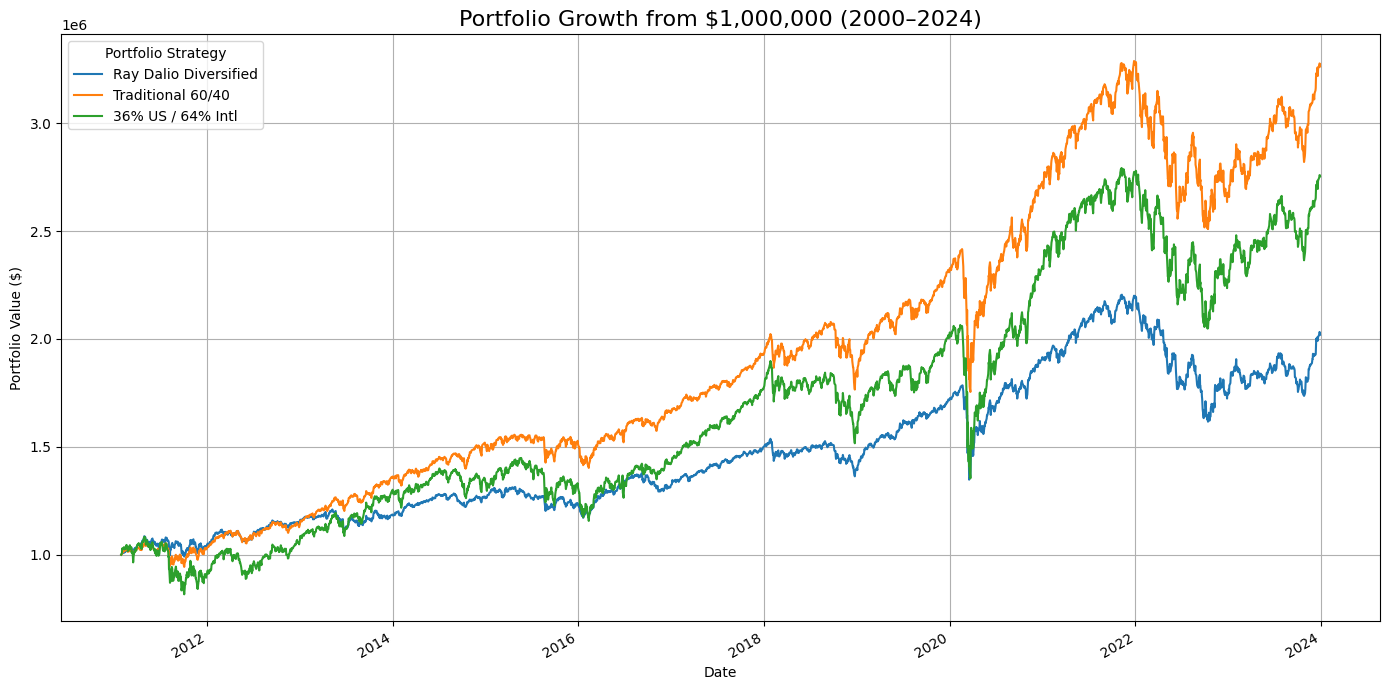


Final Portfolio Values (as of 2024-01-01):
Ray Dalio Diversified    $2,019,193
Traditional 60/40        $3,262,221
36% US / 64% Intl        $2,753,219
Name: 2023-12-29 00:00:00, dtype: object


In [17]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Function to fetch adjusted close prices
def fetch_prices(tickers, start='2000-01-01', end='2024-01-01'):
    data = yf.download(tickers, start=start, end=end, progress=False, auto_adjust=True)

    # Check if columns is a MultiIndex
    if isinstance(data.columns, pd.MultiIndex):
        # Access 'Close' instead of 'Adj Close' for auto_adjust=True
        # Use data.xs to select the 'Close' column at level 1
        # If 'Close' is not found at level 1, try level 0
        try:
            adj_close_data = data.xs('Close', axis=1, level=1)
        except KeyError:
            adj_close_data = data.xs('Close', axis=1, level=0)
    else:
        # If not MultiIndex, access 'Close' column directly since using auto_adjust=True
        adj_close_data = data['Close']

    # Remove rows with NaN values
    return adj_close_data.dropna()

# Function to simulate portfolio growth
def simulate_portfolio(prices, weights, initial_investment=1_000_000):
    prices = prices.dropna()
    normalized = prices / prices.iloc[0]
    weighted = normalized.mul(weights, axis=1)
    portfolio = weighted.sum(axis=1) * initial_investment
    return portfolio

# Define portfolios
portfolios = {
    "Ray Dalio Diversified": {
        "tickers": ['VTI', 'VXUS', 'BND', 'TLT', 'LQD', 'GLD', 'DBC', 'VNQ', 'PSP'],
        "weights": [1/9]*9
    },
    "Traditional 60/40": {
        "tickers": ['VTI', 'BND'],
        "weights": [0.6, 0.4]
    },
    "36% US / 64% Intl": {
        "tickers": ['VTI', 'VXUS'],
        "weights": [0.36, 0.64]
    }
}

# Get all unique tickers
all_tickers = sorted({t for p in portfolios.values() for t in p['tickers']})

# Fetch prices
price_data = fetch_prices(all_tickers)

# Simulate portfolios
results = {}
for name, portfolio in portfolios.items():
    try:
        tickers = portfolio['tickers']
        weights = portfolio['weights']
        prices = price_data[tickers]
        results[name] = simulate_portfolio(prices, weights)
    except Exception as e:
        print(f"Skipping {name} due to error: {e}")

# Combine results into a DataFrame
portfolio_df = pd.DataFrame(results)

# Plot
plt.figure(figsize=(14, 7))
portfolio_df.plot(ax=plt.gca())
plt.title("Portfolio Growth from $1,000,000 (2000–2024)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Portfolio Strategy")
plt.show()

# Show final portfolio values
print("\nFinal Portfolio Values (as of 2024-01-01):")
print(portfolio_df.iloc[-1].apply(lambda x: f"${x:,.0f}"))

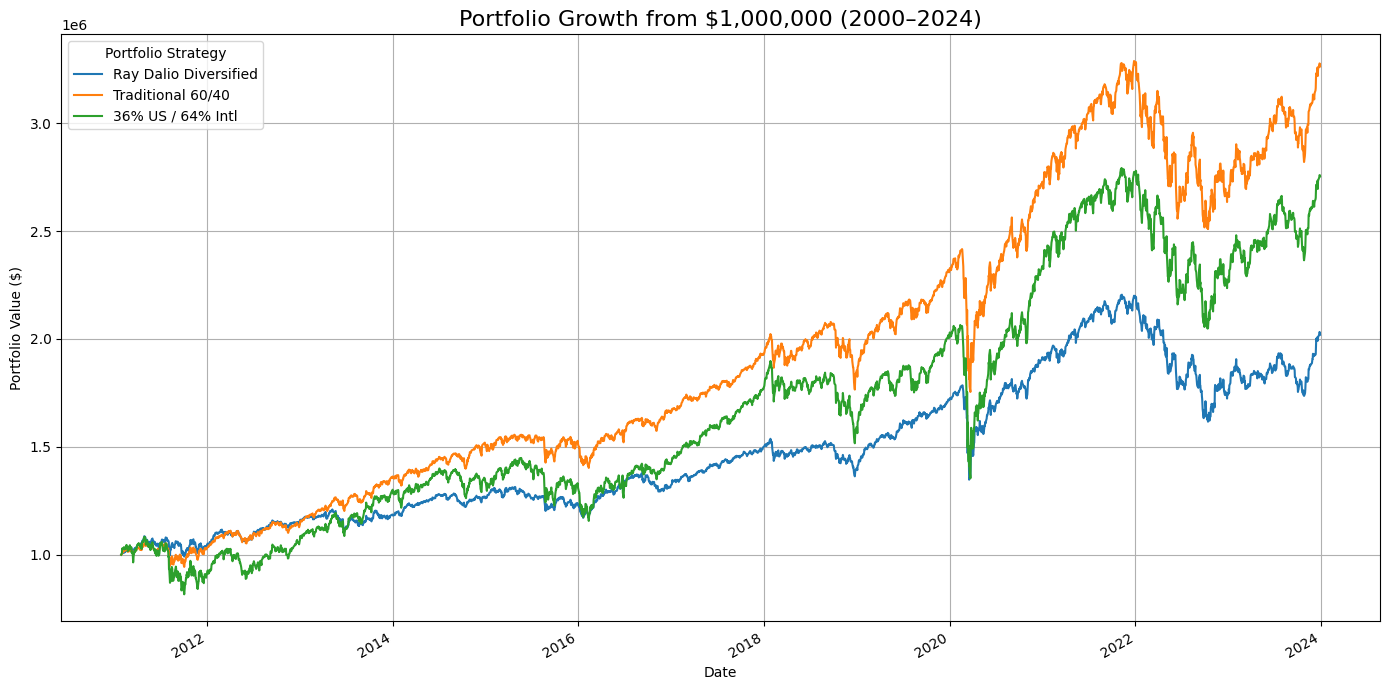


Final Portfolio Values (as of 2024-01-01):
Ray Dalio Diversified    $2,019,193
Traditional 60/40        $3,262,221
36% US / 64% Intl        $2,753,219
Name: 2023-12-29 00:00:00, dtype: object

📉 Risk Metrics Summary:
                      Annualized Return Volatility Sharpe Ratio Max Drawdown
Traditional 60/40                 9.59%     12.88%       43.35%      -27.39%
36% US / 64% Intl                 8.16%     17.55%       23.68%      -34.40%
Ray Dalio Diversified             5.59%     10.24%       15.53%      -26.69%


<ipython-input-18-409e0068d045>:123: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(risk_summary.applymap(lambda x: f"{x:.2%}" if isinstance(x, float) else x))


In [18]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =======================
# 1. Fetch Adjusted Prices
# =======================
def fetch_prices(tickers, start='2000-01-01', end='2024-01-01'):
    data = yf.download(tickers, start=start, end=end, progress=False, auto_adjust=True)

    if isinstance(data.columns, pd.MultiIndex):
        try:
            adj_close_data = data.xs('Close', axis=1, level=1)
        except KeyError:
            adj_close_data = data.xs('Close', axis=1, level=0)
    else:
        adj_close_data = data['Close']

    return adj_close_data.dropna()

# ==========================
# 2. Simulate Portfolio Growth
# ==========================
def simulate_portfolio(prices, weights, initial_investment=1_000_000):
    prices = prices.dropna()
    normalized = prices / prices.iloc[0]
    weighted = normalized.mul(weights, axis=1)
    portfolio = weighted.sum(axis=1) * initial_investment
    return portfolio

# ===================
# 3. Define Portfolios
# ===================
portfolios = {
    "Ray Dalio Diversified": {
        "tickers": ['VTI', 'VXUS', 'BND', 'TLT', 'LQD', 'GLD', 'DBC', 'VNQ', 'PSP'],
        "weights": [1/9]*9
    },
    "Traditional 60/40": {
        "tickers": ['VTI', 'BND'],
        "weights": [0.6, 0.4]
    },
    "36% US / 64% Intl": {
        "tickers": ['VTI', 'VXUS'],
        "weights": [0.36, 0.64]
    }
}

# ================
# 4. Run Simulation
# ================
all_tickers = sorted({t for p in portfolios.values() for t in p['tickers']})
price_data = fetch_prices(all_tickers)

results = {}
for name, portfolio in portfolios.items():
    try:
        tickers = portfolio['tickers']
        weights = portfolio['weights']
        prices = price_data[tickers]
        results[name] = simulate_portfolio(prices, weights)
    except Exception as e:
        print(f"Skipping {name} due to error: {e}")

portfolio_df = pd.DataFrame(results)

# =====================
# 5. Plot Portfolio Growth
# =====================
plt.figure(figsize=(14, 7))
portfolio_df.plot(ax=plt.gca())
plt.title("Portfolio Growth from $1,000,000 (2000–2024)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Portfolio Strategy")
plt.show()

# ===============================
# 6. Final Portfolio Value (2024)
# ===============================
print("\nFinal Portfolio Values (as of 2024-01-01):")
print(portfolio_df.iloc[-1].apply(lambda x: f"${x:,.0f}"))

# ======================
# 7. Risk Metrics Section
# ======================
risk_free_rate = 0.04  # Assume 4% annualized risk-free rate

# Daily returns
daily_returns = portfolio_df.pct_change().dropna()

# Annualized volatility
volatility = daily_returns.std() * np.sqrt(252)

# Annualized returns
total_days = (portfolio_df.index[-1] - portfolio_df.index[0]).days
annualized_returns = (portfolio_df.iloc[-1] / portfolio_df.iloc[0]) ** (365.25 / total_days) - 1

# Sharpe ratio
sharpe_ratio = (annualized_returns - risk_free_rate) / volatility

# Max drawdown calculation
max_drawdowns = {}
for column in portfolio_df.columns:
    cumulative = portfolio_df[column]
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    max_drawdowns[column] = drawdown.min()

# Combine metrics into a summary DataFrame
risk_summary = pd.DataFrame({
    "Annualized Return": annualized_returns,
    "Volatility": volatility,
    "Sharpe Ratio": sharpe_ratio,
    "Max Drawdown": pd.Series(max_drawdowns)
}).sort_values("Sharpe Ratio", ascending=False)

# Display results
print("\n📉 Risk Metrics Summary:")
print(risk_summary.applymap(lambda x: f"{x:.2%}" if isinstance(x, float) else x))



📉 Portfolio Performance During Major Crises:
                      Ray Dalio Diversified  Traditional 60/40  \
COVID Crash                          -14.61             -14.72   
2022 Inflation Shock                 -15.46             -17.03   

                      36% US / 64% Intl  
COVID Crash                      -24.97  
2022 Inflation Shock             -17.85  


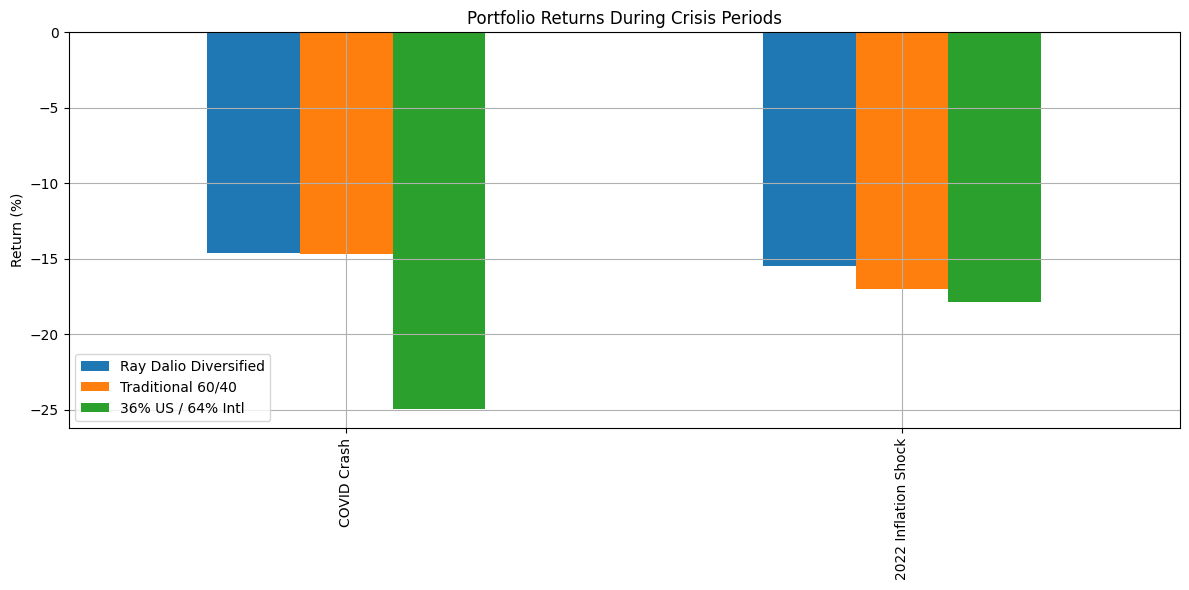

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define crisis periods
crisis_periods = {
    #"Dot-com Bust": ("2000-03-01", "2002-10-01"),
    #"Financial Crisis": ("2007-10-01", "2009-03-01"),
    "COVID Crash": ("2020-02-01", "2020-04-01"),
    "2022 Inflation Shock": ("2022-01-01", "2022-12-31")
}

# Define portfolios
portfolios = {
    "Ray Dalio Diversified": {
        "tickers": ['VTI', 'VXUS', 'BND', 'TLT', 'LQD', 'GLD', 'DBC', 'VNQ', 'PSP'],
        "weights": [1/9]*9
    },
    "Traditional 60/40": {
        "tickers": ['VTI', 'BND'],
        "weights": [0.6, 0.4]
    },
    "36% US / 64% Intl": {
        "tickers": ['VTI', 'VXUS'],
        "weights": [0.36, 0.64]
    }
}

# Get all unique tickers
all_tickers = sorted({t for p in portfolios.values() for t in p['tickers']})

# Function to fetch adjusted close prices
def fetch_prices(tickers, start='2000-01-01', end='2024-01-01'):
    data = yf.download(tickers, start=start, end=end, progress=False, auto_adjust=True)
    if isinstance(data.columns, pd.MultiIndex):
        try:
            adj_close_data = data.xs('Close', axis=1, level=1)
        except KeyError:
            adj_close_data = data.xs('Close', axis=1, level=0)
    else:
        adj_close_data = data['Close']
    return adj_close_data.dropna()

# Function to simulate portfolio growth
def simulate_portfolio(prices, weights, initial_investment=1_000_000):
    prices = prices.dropna()
    normalized = prices / prices.iloc[0]
    weighted = normalized.mul(weights, axis=1)
    portfolio = weighted.sum(axis=1) * initial_investment
    return portfolio

# Fetch all prices
price_data = fetch_prices(all_tickers)

# Analyze crisis returns
crisis_results = {}

for crisis, (start, end) in crisis_periods.items():
    price_segment = price_data.loc[start:end]
    crisis_returns = {}
    for name, portfolio in portfolios.items():
        try:
            tickers = portfolio["tickers"]
            weights = portfolio["weights"]
            prices = price_segment[tickers]
            portfolio_values = simulate_portfolio(prices, weights)
            total_return = (portfolio_values.iloc[-1] / portfolio_values.iloc[0]) - 1
            crisis_returns[name] = total_return
        except Exception as e:
            crisis_returns[name] = np.nan
    crisis_results[crisis] = crisis_returns

# Create DataFrame
crisis_df = pd.DataFrame(crisis_results).T * 100
crisis_df = crisis_df.round(2)

# Print the results
print("\n📉 Portfolio Performance During Major Crises:")
print(crisis_df)

# Optional: plot bar chart
crisis_df.plot(kind='bar', figsize=(12,6), title='Portfolio Returns During Crisis Periods')
plt.ylabel("Return (%)")
plt.grid(True)
plt.tight_layout()
plt.show()




📉 Portfolio Performance During Major Crises:

                              Ray Dalio Diversified  Traditional 60/40  \
Dot-com Bust (2000–2002)                        NaN                NaN   
Financial Crisis (2007–2009)                    NaN             -27.15   
COVID Crash (2020)                           -14.61             -14.72   
Inflation Shock (2022)                       -15.46             -17.03   

                              36% US / 64% Intl  
Dot-com Bust (2000–2002)                    NaN  
Financial Crisis (2007–2009)                NaN  
COVID Crash (2020)                       -24.97  
Inflation Shock (2022)                   -17.85  


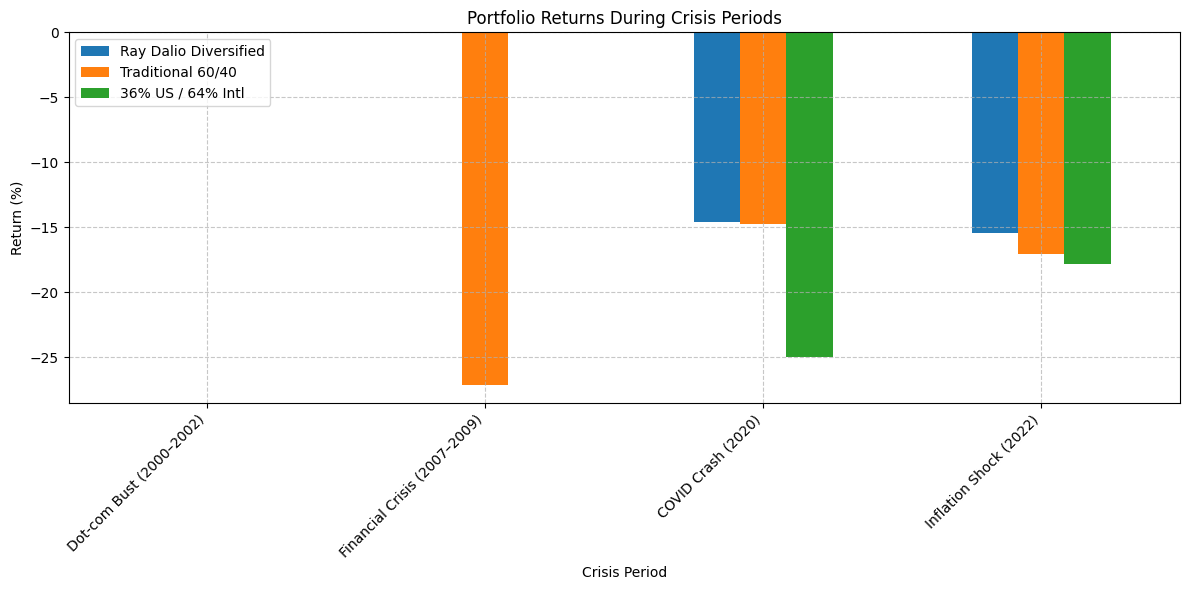

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define crisis periods with clear names
crisis_periods = {
    "Dot-com Bust (2000–2002)": ("2000-03-01", "2002-10-01"),
    "Financial Crisis (2007–2009)": ("2007-10-01", "2009-03-01"),
    "COVID Crash (2020)": ("2020-02-01", "2020-04-01"),
    "Inflation Shock (2022)": ("2022-01-01", "2022-12-31")
}

# Define portfolios
portfolios = {
    "Ray Dalio Diversified": {
        "tickers": ['VTI', 'VXUS', 'BND', 'TLT', 'LQD', 'GLD', 'DBC', 'VNQ', 'PSP'],
        "weights": [1/9] * 9
    },
    "Traditional 60/40": {
        "tickers": ['VTI', 'BND'],
        "weights": [0.6, 0.4]
    },
    "36% US / 64% Intl": {
        "tickers": ['VTI', 'VXUS'],
        "weights": [0.36, 0.64]
    }
}

# Get all unique tickers across portfolios
all_tickers = sorted({ticker for p in portfolios.values() for ticker in p['tickers']})

# Fetch adjusted close prices
def fetch_prices(tickers, start='2000-01-01', end='2024-01-01'):
    data = yf.download(tickers, start=start, end=end, progress=False, auto_adjust=True)
    if isinstance(data.columns, pd.MultiIndex):
        # Get 'Close' level from multi-index
        try:
            adj_close = data.xs('Close', axis=1, level=1)
        except KeyError:
            adj_close = data.xs('Close', axis=1, level=0)
    else:
        adj_close = data['Close']
    return adj_close.dropna(how='all')

# Simulate portfolio value over time
def simulate_portfolio(prices, weights, initial_investment=1_000_000):
    prices = prices.dropna()
    normalized = prices / prices.iloc[0]
    weighted = normalized.mul(weights, axis=1)
    portfolio = weighted.sum(axis=1) * initial_investment
    return portfolio

# Fetch all price data
price_data = fetch_prices(all_tickers)

# Analyze performance during crises
crisis_results = {}

for crisis_name, (start, end) in crisis_periods.items():
    price_segment = price_data.loc[start:end]
    returns = {}
    for portfolio_name, portfolio in portfolios.items():
        tickers = portfolio['tickers']
        weights = portfolio['weights']
        try:
            prices = price_segment[tickers]
            portfolio_values = simulate_portfolio(prices, weights)
            total_return = (portfolio_values.iloc[-1] / portfolio_values.iloc[0]) - 1
            returns[portfolio_name] = total_return
        except Exception:
            returns[portfolio_name] = np.nan
    crisis_results[crisis_name] = returns

# Convert results to DataFrame
crisis_df = pd.DataFrame(crisis_results).T * 100
crisis_df = crisis_df.round(2)

# Display results
print("\n📉 Portfolio Performance During Major Crises:\n")
print(crisis_df)

# Plot the performance
crisis_df.plot(kind='bar', figsize=(12, 6), title='Portfolio Returns During Crisis Periods')
plt.ylabel('Return (%)')
plt.xlabel('Crisis Period')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

